# Gradient Descent 


$$f(\mathbf{x})=f\left(x_{1}, x_{2}\right)=\left(a+1-x_{1}\right)^{2}+b \cdot\left(x_{2}-x_{1}^{2}\right)^{2}$$
Taking $a$ = 0.5 and $b$ = 60

In [1]:
import math as m

a = 0.5
b = 60
def grad(x1,x2):
    global c
    gradfx1= -2*(a + 1 -x1) - 4*b*x1*(x2 - x1**2)
    gradfx2=  2*b*(x2 - x1**2)
    c+=1
    return gradfx1, gradfx2, c

x1_traj = []
x2_traj = []
iterations=[]
check = []
for i in range(1,8):
    c=0
    tol= 10**(-i)
    x1= -1.5
    x2= 1.5
    gradfx1, gradfx2, c = grad(x1,x2)
    check.append(i)

    while m.sqrt((gradfx1**2)+(gradfx2**2))>tol:
        x1= x1- 0.0001*gradfx1
        x2= x2- 0.0001*gradfx2
        gradfx1, gradfx2, c  = grad(x1,x2)
        # Store points for trajectory
        x1_traj.append(x1)
        x2_traj.append(x2)
                   
    print('X1= ',x1,'X2= ', x2)
    print('Optimum value= ', (((1-x1)**2)+100*((x2-(x1**2))**2)))
    print('Number of iterations= ',c)
    print()
    iterations.append(c)
    print(i)
               

X1=  1.355522303258441 X2=  1.8366586832208127
Optimum value=  0.12645726542684954
Number of iterations=  66615

1
X1=  1.4843373252809793 X2=  2.203178309265021
Optimum value=  0.23458326853847772
Number of iterations=  170354

2
X1=  1.4984203606772992 X2=  2.2452556711150753
Optimum value=  0.24842286218845286
Number of iterations=  284387

3
X1=  1.4998419016237945 X2=  2.249524939176295
Optimum value=  0.24984192668141014
Number of iterations=  399560

4
X1=  1.499984188806841 X2=  2.249952487600725
Optimum value=  0.24998418905746006
Number of iterations=  514848

5
X1=  1.4999984188815612 X2=  2.2499952487402686
Optimum value=  0.24999841888406735
Number of iterations=  630148

6
X1=  1.4999998418889855 X2=  2.2499995248762947
Optimum value=  0.24999984188901056
Number of iterations=  745449

7


,Tolerance,Number of iterations
0,10^(-1),66615
1,10^(-2),170354
2,10^(-3),284387
3,10^(-4),399560
4,10^(-5),514848
5,10^(-6),630148
6,10^(-7),745449


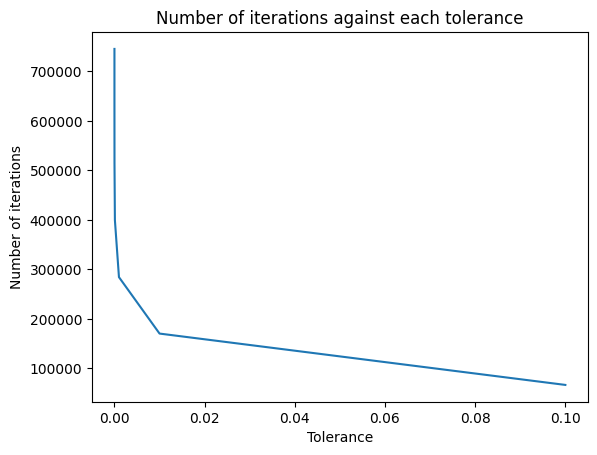

In [2]:
#Number of iterations against each Tolerance
import pandas as pd
import matplotlib.pyplot as plt
plt.plot([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7],iterations)
plt.xlabel('Tolerance')
plt.ylabel('Number of iterations')
plt.title('Number of iterations against each tolerance')

df= pd.DataFrame({'Tolerance':['10^(-1)','10^(-2)','10^(-3)','10^(-4)','10^(-5)','10^(-6)','10^(-7)'],'Number of iterations':iterations})
df


Observations:
\
\
**Convergence Speed:**
\
\
Decreasing the tolerance (moving from left to right on the plot) generally results in an increased number of iterations for convergence.
Smaller tolerances demand more iterations as the algorithm strives for a more precise solution.
\
\
**Effectiveness of the Algorithm:**

The gradient descent algorithm demonstrates effectiveness across a range of tolerance values, successfully converging for each tested case.
However, the convergence rate varies, and achieving convergence might require more iterations for smaller tolerance values.
\
\
**Minimizers and Objective Function Values:**



The minimizers (x1 and x2 values) and objective function values are anticipated to be similar for different tolerance values, with increased precision as the tolerance decreases.
Lower tolerance values yield a more accurate approximation of the objective function minimum.
\
\
**Trade-off between Precision and Computational Cost:**
\
\
Opting for a smaller tolerance provides a more accurate solution but introduces a trade-off with increased computational effort (more iterations).
Balancing solution precision with computational resources is crucial.
\
\
**Behavior for Extremely Small Tolerance:**
\
\
As tolerance approaches extremely small values, the algorithm may exhibit diminishing returns in terms of improvement in the objective function value.
The computational cost may significantly rise without a proportional gain in precision.

### Plotting  the level sets of the above function and also plot the trajectory of the optimization on the same plot

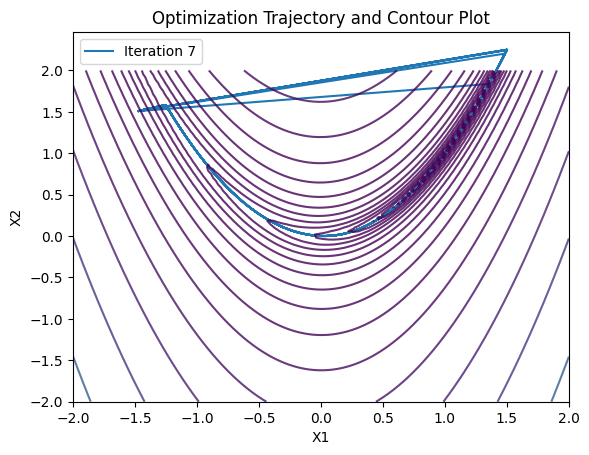

In [3]:
import numpy as np
# Plot the optimization trajectory
plt.plot(x1_traj, x2_traj, label=f"Iteration {i}")

# Contour plot
x1_vals = np.linspace(-2, 2, 100)
x2_vals = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = ((1 - X1) ** 2) + 100 * ((X2 - X1 ** 2) ** 2)

plt.contour(X1, X2, Z, levels=np.logspace(-1, 4, 20), cmap="viridis", alpha=0.8)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Optimization Trajectory and Contour Plot')
plt.legend()
plt.show()

# Newton's Method

$$f(\mathbf{x})=f\left(x_{1}, x_{2}\right)=\left(a+1-x_{1}\right)^{2}+b \cdot\left(x_{2}-x_{1}^{2}\right)^{2}$$
Taking $a$ = 2 and $b$ = 80

#### Function

In [4]:
from sympy import *

x1 = Symbol('x1')
x2 = Symbol('x2')

f = (2-x1)**2 + 60*(x2-x1**2)**2
print(f)

(2 - x1)**2 + 60*(-x1**2 + x2)**2


#### Finding 1st derivative

In [5]:
f_prime_x1 = f.diff(x1)
print(f_prime_x1)



f_prime_x2 = f.diff(x2)
print(f_prime_x2)

-240*x1*(-x1**2 + x2) + 2*x1 - 4
-120*x1**2 + 120*x2


#### Applying 1st Derivative condition,

∇f(x₁,x₂) = 
[ ∂f(x₁,x₂)/∂x₁ ] 
[ ∂f(x₁,x₂)/∂x₂ ] = 0

∇f(x₁,x₂) =
[ 2x₁ - 6 + 80x₁³ - 80x₁x₂ ]
[ 40x₂ - 40x₁² ]
= 0

Solving the above, x₁ = 3, x₂ = 9 

### Finding 2nd Partial Derivatives

In [6]:
f_doubleprime_x1_x1 = f_prime_x1.diff(x1)
print(f_doubleprime_x1_x1)


f_doubleprime_x1_x2 = f_prime_x1.diff(x2)
print(f_doubleprime_x1_x2)


f_doubleprime_x2_x1 = f_prime_x2.diff(x1)
print(f_doubleprime_x2_x1)


f_doubleprime_x2_x2 = f_prime_x2.diff(x2)
print(f_doubleprime_x2_x2)

720*x1**2 - 240*x2 + 2
-240*x1
-240*x1
120


### Applying 2nd Derivative condition,

∇²f(x₁,x₂) =
[ ∂²f(x₁,x₂)/∂x₁∂x₁  ∂²f(x₁,x₂)/∂x₁∂x₂ ]
[ ∂²f(x₁,x₂)/∂x₂∂x₁  ∂²f(x₁,x₂)/∂x₂∂x₂ ]

∇²f(x₁,x₂) =
[ 240x₁² - 80x₂ + 2  -80x₁ ]
[ -80x₁  40 ]

∇²f(3, 9) =
[ 1442  -240 ]
[ -240  40 ]

∇²f(3, 9) = 80 = +ve

Both eigenvalues of the ∇²f(3, 9) matrix are positive, which means that ∇²f(3, 9) is positive definite.

Therefore, the function f(x₁,x₂) has a minimum value at the point x₁ = 3, x₂ = 9.

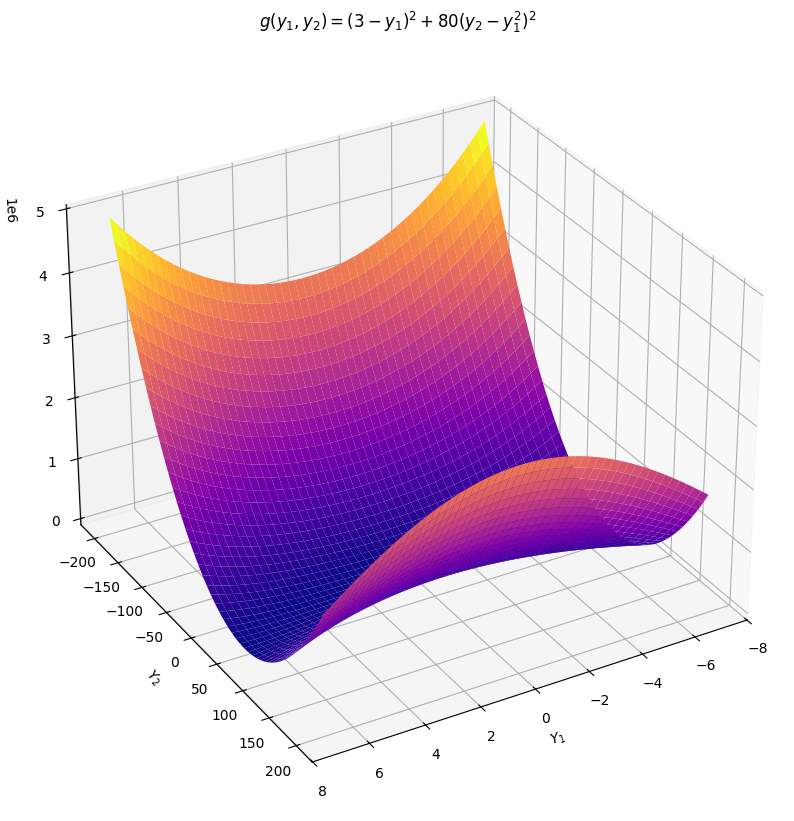

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-7, 7, 1000)
x2 = np.linspace(-200, 200, 1000)

X1, X2 = np.meshgrid(x1, x2)

f = (3 - X1) ** 2 + 80 * (X2 - X1 ** 2) ** 2

plt.figure(figsize=(10, 14))
ax = plt.axes(projection="3d")

ax.plot_surface(X1, X2, f, cmap='plasma')

ax.view_init(azim=60, elev=30)
ax.set_xlabel(r"$Y_1$")
ax.set_ylabel(r"$Y_2$")
# ax.set_zlabel(r"$f(x_1, x_2)$")
plt.title(r"$g(y_1, y_2) = (3 - y_1)^2 + 80(y_2 - y_1^2)^2$")

plt.show()

p: 1, t: 0.1, x1: 1.9999999999999925, x2: 3.9999999997646447, Iterations: 7, f(x1,x2): 3.322673956600437e-18
p: 2, t: 0.01, x1: 1.9999999999999925, x2: 3.9999999997646447, Iterations: 1, f(x1,x2): 3.322673956600437e-18
p: 3, t: 0.001, x1: 1.9999999999999925, x2: 3.9999999997646447, Iterations: 1, f(x1,x2): 3.322673956600437e-18
p: 4, t: 0.0001, x1: 1.9999999999999925, x2: 3.9999999997646447, Iterations: 1, f(x1,x2): 3.322673956600437e-18
p: 5, t: 1e-05, x1: 1.9999999999999925, x2: 3.9999999997646447, Iterations: 1, f(x1,x2): 3.322673956600437e-18
p: 6, t: 1e-06, x1: 1.9999999999999925, x2: 3.9999999997646447, Iterations: 1, f(x1,x2): 3.322673956600437e-18
p: 7, t: 1e-07, x1: 2.0, x2: 4.0, Iterations: 3, f(x1,x2): 0.0
p: 8, t: 1e-08, x1: 2.0, x2: 4.0, Iterations: 1, f(x1,x2): 0.0
p: 9, t: 1e-09, x1: 2.0, x2: 4.0, Iterations: 1, f(x1,x2): 0.0
p: 10, t: 1e-10, x1: 2.0, x2: 4.0, Iterations: 1, f(x1,x2): 0.0
p: 11, t: 1e-11, x1: 2.0, x2: 4.0, Iterations: 1, f(x1,x2): 0.0
p: 12, t: 1e-12, x1

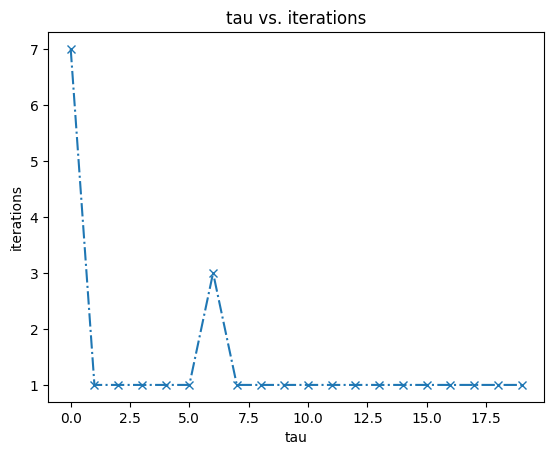

In [8]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

x1 = Symbol('x1')
x2 = Symbol('x2')
x1_s, x2_s = [], []
tou, iterations = [], []

f = (2-x1)**2 + 60*(x2-x1**2)**2
f_prime_x1 = f.diff(x1)
f_prime_x2 = f.diff(x2)
f_doubleprime_x1x1 = f_prime_x1.diff(x1)
f_doubleprime_x1x2 = f_prime_x1.diff(x2)
f_doubleprime_x2x1 = f_prime_x2.diff(x1)
f_doubleprime_x2x2 = f_prime_x2.diff(x2)


fx1x2 = lambdify([x1, x2], f)
fx1x2_prime_x1 = lambdify([x1,x2], f_prime_x1)
fx1x2_prime_x2 = lambdify([x1,x2], f_prime_x2)
fx1x2_doubleprime_x1x1 = lambdify([x1,x2], f_doubleprime_x1x1)
fx1x2_doubleprime_x1x2 = lambdify([x1,x2], f_doubleprime_x1x2)
fx1x2_doubleprime_x2x1 = lambdify([x1,x2], f_doubleprime_x2x1)
fx1x2_doubleprime_x2x2 = lambdify([x1,x2], f_doubleprime_x2x2)


x0 = np.array([-1.5, 1.5])
x1 = x0[0]
x2 = x0[1]


for p in range(1,21):

  grad_1 = np.array([[fx1x2_prime_x1(x1,x2)],
                      [fx1x2_prime_x2(x1,x2)]])
  grad_1_norm =  np.linalg.norm(grad_1)
  t = 10**(-p)
  tou.append(t)

  counter = 1
  while grad_1_norm > t:

    grad_1 = np.array([[fx1x2_prime_x1(x1,x2)],
                      [fx1x2_prime_x2(x1,x2)]])
    grad_2 = np.array([[fx1x2_doubleprime_x1x1(x1,x2), fx1x2_doubleprime_x1x2(x1,x2)],
                      [fx1x2_doubleprime_x2x1(x1,x2), fx1x2_doubleprime_x2x2(x1,x2)]])

    grad_1_norm =  np.linalg.norm(grad_1)

    x1 = (x1 - (np.linalg.inv(grad_2).transpose() @ grad_1)[0])[0]
    x2 = (x2 - (np.linalg.inv(grad_2).transpose() @ grad_1)[1])[0]

    x1_s.append(x1)
    x2_s.append(x2)

    counter += 1

  iterations.append(counter)
  print(f"p: {p}, t: {t}, x1: {x1}, x2: {x2}, Iterations: {counter}, f(x1,x2): {fx1x2(x1,x2)}")


plt.plot(iterations, marker='x', mfc = 'g', linestyle='dashdot')
plt.xlabel(f"tau")
plt.ylabel(f"iterations")
plt.title("tau vs. iterations")
plt.savefig('my_plot.png'
)